In [25]:
# # Export the CUDA_VISIBLE_DEVICES environment variable
# import os

# output = !python3 /workspace/search_gpu.py --target 10

# os.environ["CUDA_VISIBLE_DEVICES"] = output[0]

# # Display the value of cuda_device
# print("CUDA device:", os.environ["CUDA_VISIBLE_DEVICES"] )

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-c65e10b9-6854-5af7-b015-f5f0c73639d1"


!cd /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11
!pwd

/workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11


In [3]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install opendatasets
!pip install ultralytics

# Clean up the notebook
clean_notebook()



Notebook cleaned.


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/keshabkkumar/yolo-datasets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  tuchsanai


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/keshabkkumar/yolo-datasets


100%|██████████| 11.0M/11.0M [00:01<00:00, 6.19MB/s]

In [2]:

import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 1g.10gb, 9728MiB)
Setup complete ✅ (256 CPUs, 2015.7 GB RAM, 263.7/3519.1 GB disk)


# Apply images


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 224x320 6 persons, 1 sports ball, 35.2ms
Speed: 0.7ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 320)


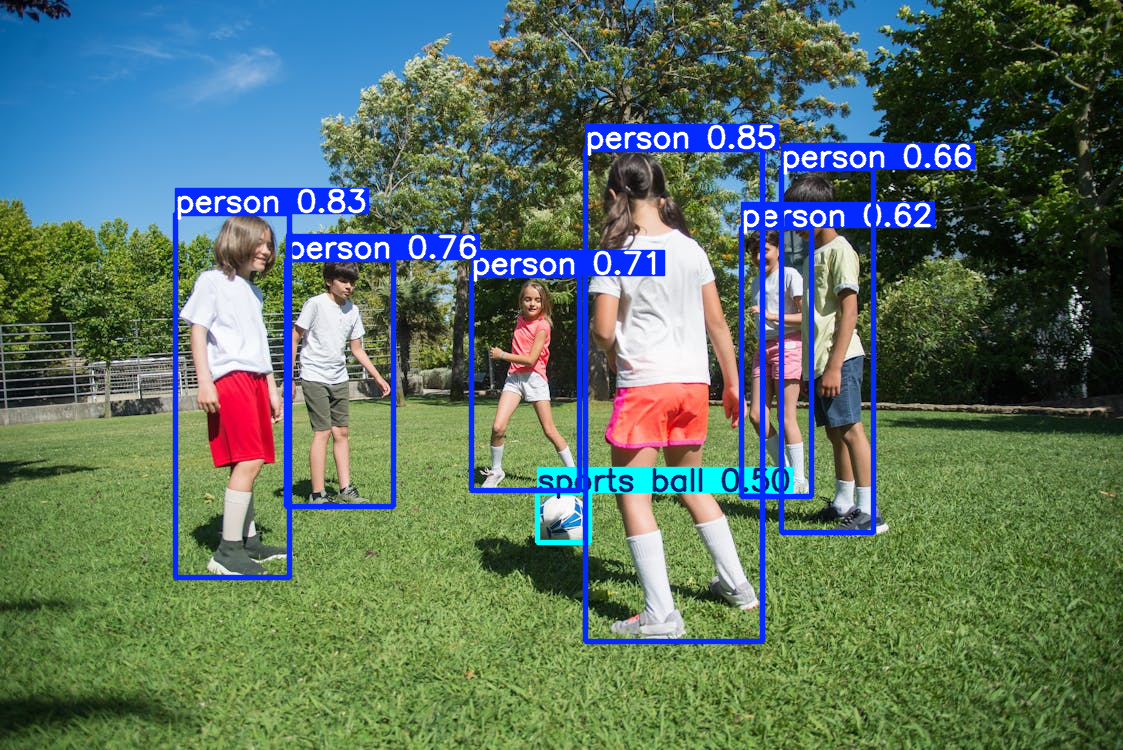

In [27]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg", imgsz= 320)
results[0].show()

In [9]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  0., 32.,  0.,  0.], device='cuda:0')
conf: tensor([0.9159, 0.9015, 0.8754, 0.8625, 0.8418, 0.7946, 0.7920], device='cuda:0')
data: tensor([[5.8782e+02, 1.5014e+02, 7.6319e+02, 6.4065e+02, 9.1586e-01, 0.0000e+00],
        [4.7367e+02, 2.7749e+02, 5.8435e+02, 4.8869e+02, 9.0148e-01, 0.0000e+00],
        [2.8089e+02, 2.5535e+02, 3.9181e+02, 5.0737e+02, 8.7544e-01, 0.0000e+00],
        [1.7860e+02, 2.1189e+02, 2.8908e+02, 5.8141e+02, 8.6254e-01, 0.0000e+00],
        [5.3606e+02, 4.9325e+02, 5.9276e+02, 5.4718e+02, 8.4184e-01, 3.2000e+01],
        [7.7974e+02, 1.7540e+02, 8.8427e+02, 5.3769e+02, 7.9461e-01, 0.0000e+00],
        [7.4684e+02, 2.2177e+02, 8.1048e+02, 4.9690e+02, 7.9202e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (750, 1123)
shape: torch.Size([7, 6])
xywh: tensor([[675.5012, 395.3991, 175.3689, 490.5117],
        [529.0074, 383.0865, 110.6836, 211.1985],
        [

# Apply with Open CV


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 1 sports ball, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


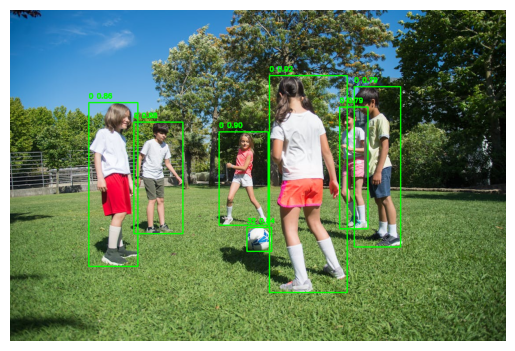

In [13]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg")

# Load the image using OpenCV
image = cv2.imread("./yolo-datasets/YOLO Datasets/test.jpeg")

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    
    # Loop through each box
    for box in boxes:
        # Extract the coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        
        # Draw the rectangle on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with 2px thickness

        # Convert class and confidence to Python types
        class_id = int(box.cls[0]) if hasattr(box.cls, '__iter__') else int(box.cls)
        confidence = float(box.conf[0]) if hasattr(box.conf, '__iter__') else float(box.conf)
        
        # Optionally, add a label or confidence score
        label = f"{class_id} {confidence:.2f}"  # Class and confidence
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert the BGR image to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.show()




# Segmentation


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 224x320 6 persons, 14.9ms
Speed: 0.7ms preprocess, 14.9ms inference, 4.3ms postprocess per image at shape (1, 3, 224, 320)


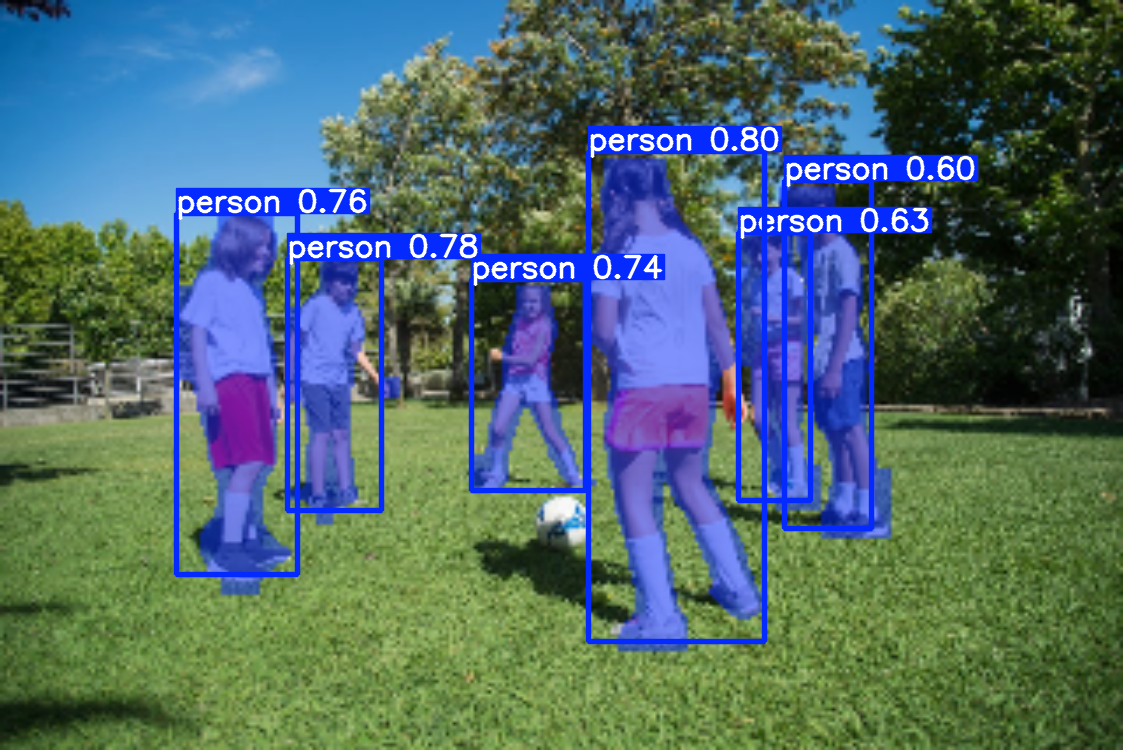

In [28]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg", imgsz= 320)
results[0].show()

# Pose Estimation

100%|██████████| 5.97M/5.97M [00:00<00:00, 181MB/s]



image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 19.5ms
Speed: 1.6ms preprocess, 19.5ms inference, 9.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/pose/predict


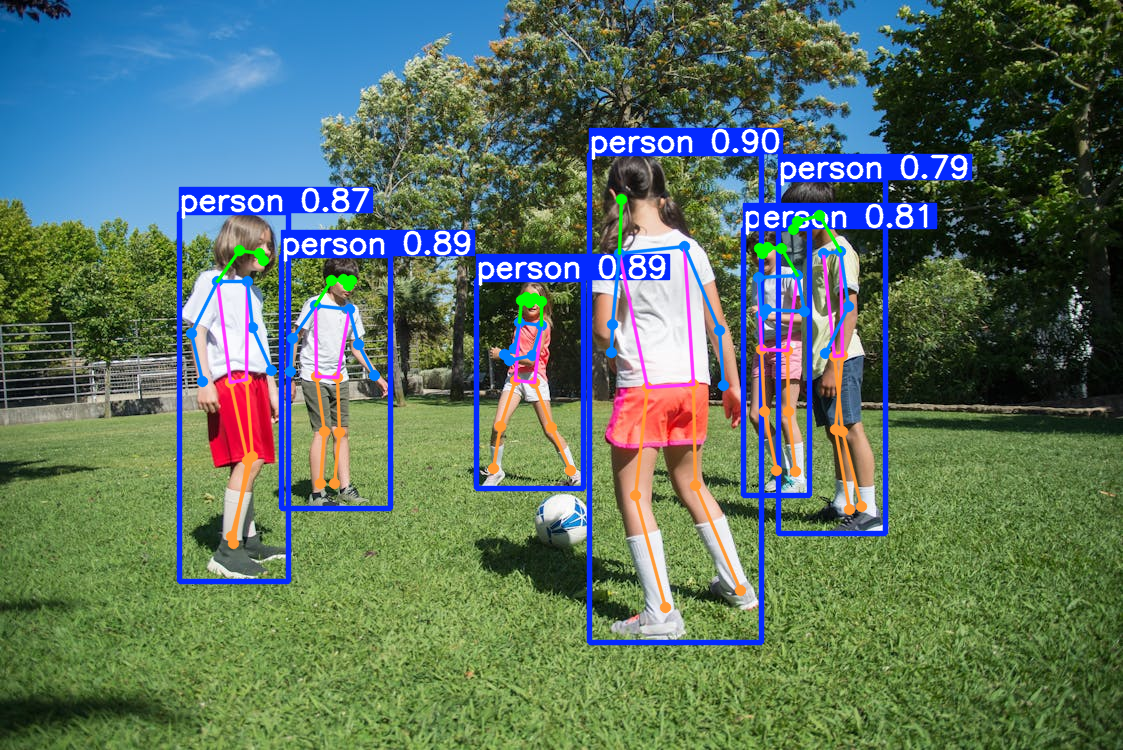

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-pose.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg", imgsz= 320)
results[0].show()

# Pose Estimation with opencv

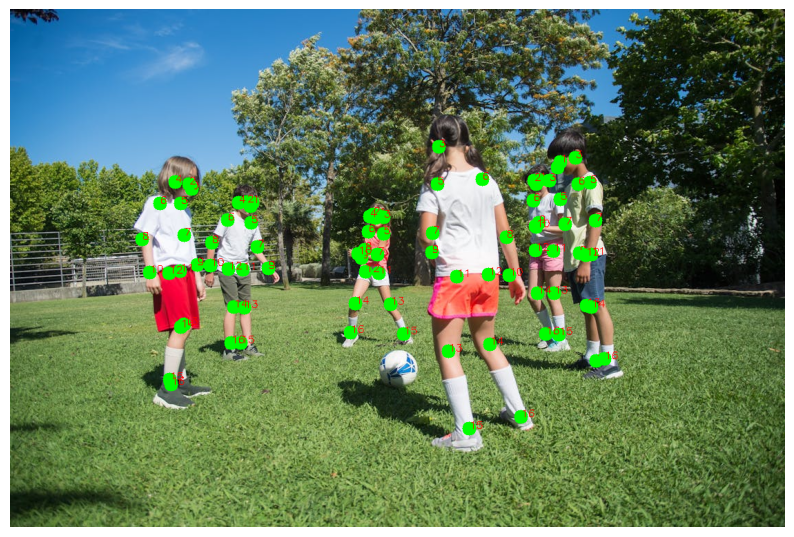

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("./yolo-datasets/YOLO Datasets/test.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Iterate over detected persons
for person in results[0].keypoints.data.cpu().numpy():
   
    for idx, keypoint in enumerate(person):
        x, y, confidence = keypoint
        if confidence > 0.5:  # Draw only if confidence is above a threshold
            cv2.circle(image_rgb, (int(x), int(y)), radius=10, color=(0, 255, 0), thickness=-1)
            cv2.putText(image_rgb, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
person.shape

(17, 3)

In [22]:
person

array([[     793.05,      229.22,     0.84989],
       [     797.07,      221.41,     0.91879],
       [          0,           0,     0.27525],
       [     819.85,      215.99,     0.94518],
       [          0,           0,    0.069852],
       [     840.79,      251.03,     0.99662],
       [      823.1,      253.93,     0.84372],
       [     848.48,      306.12,     0.99295],
       [          0,           0,     0.35087],
       [     825.72,      353.85,     0.97857],
       [          0,           0,     0.43537],
       [     842.99,      355.48,     0.99706],
       [     834.11,      356.03,     0.97492],
       [     835.58,      429.04,     0.99594],
       [      842.8,      431.02,     0.96987],
       [     849.62,      509.38,     0.98291],
       [     861.91,      506.41,     0.94149]], dtype=float32)

# Pose Skeleton connections

```
skeleton = [
    (0, 1), (1, 2), (2, 3), (3, 4),      # Right arm
    (0, 5), (5, 6), (6, 7), (7, 8),      # Left arm
    (0, 9), (9, 10), (10, 11), (11, 12), # Right leg
    (0, 13), (13, 14), (14, 15), (15, 16) # Left leg
]

```

100%|██████████| 6.52M/6.52M [00:00<00:00, 147MB/s]



image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


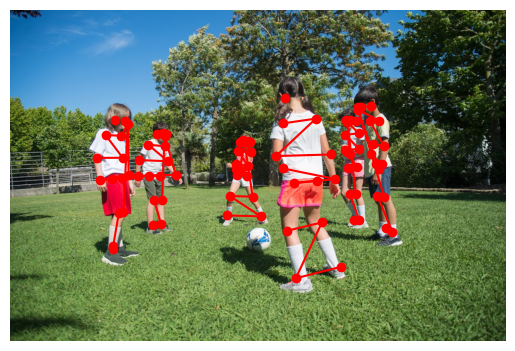

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from ultralytics import YOLO

# Load the YOLO pose estimation model
model = YOLO("yolov8n-pose.pt")  # Ensure you have the correct model file

# Perform inference on the input image
image_path = "./yolo-datasets/YOLO Datasets/test.jpeg"
results = model(image_path)

# Load the original image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the skeleton connections based on COCO keypoints
skeleton = [
    (0, 1), (1, 2), (2, 3), (3, 4),      # Right arm
    (0, 5), (5, 6), (6, 7), (7, 8),      # Left arm
    (0, 9), (9, 10), (10, 11), (11, 12), # Right leg
    (0, 13), (13, 14), (14, 15), (15, 16) # Left leg
]

# Create a Matplotlib figure
fig, ax = plt.subplots()
ax.imshow(image_rgb)

# Iterate over detected persons
for person in results[0].keypoints.data.cpu().numpy():
    keypoints = person[:, :2]  # Extract (x, y) coordinates
    confidences = person[:, 2]  # Extract confidence scores

    # Plot keypoints
    for i, (x, y) in enumerate(keypoints):
        if confidences[i] > 0.5:  # Plot only if confidence is above threshold
            ax.plot(x, y, 'ro')  # Red dot for keypoint

    # Plot skeleton connections
    for joint_start, joint_end in skeleton:
        if confidences[joint_start] > 0.5 and confidences[joint_end] > 0.5:
            x_start, y_start = keypoints[joint_start]
            x_end, y_end = keypoints[joint_end]
            ax.plot([x_start, x_end], [y_start, y_end], 'r-')  # Red line for skeleton

# Remove axis labels
ax.axis('off')

# Display the result
plt.show()


# SAM and Yolo 11


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 1 sports ball, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


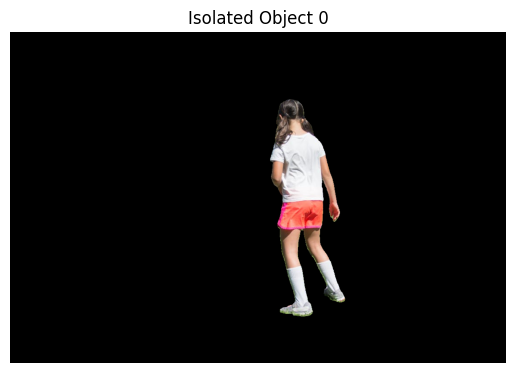

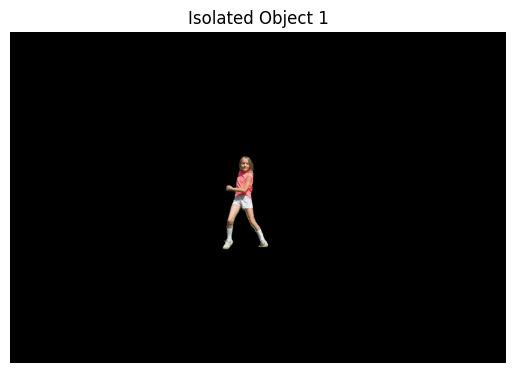

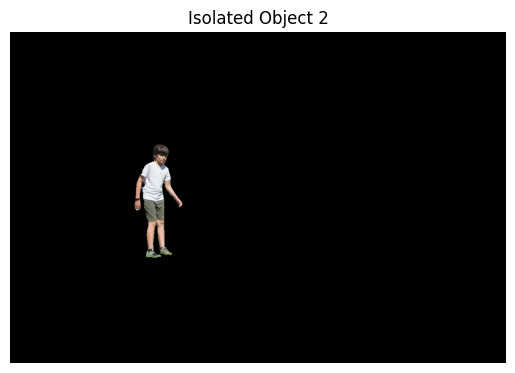

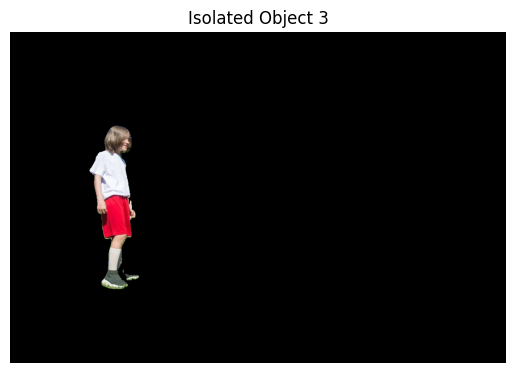

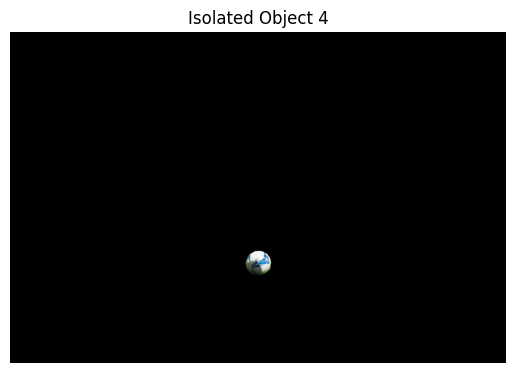

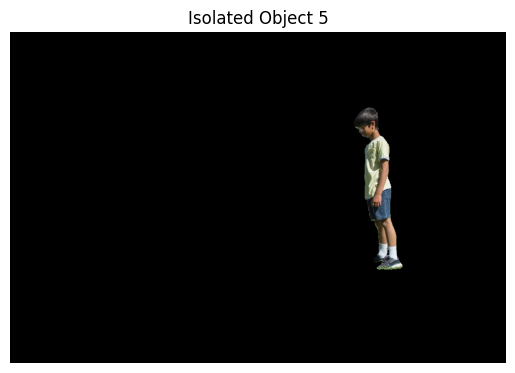

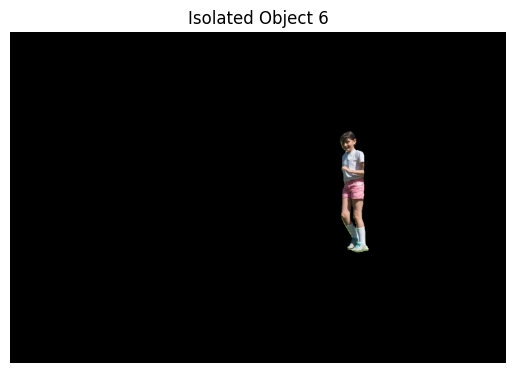

In [34]:
from ultralytics import YOLO, SAM
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For visualization

# Load the YOLOv11 model
yolo_model = YOLO("yolo11n.pt")  # Replace with your model path if different

# Load the SAM model
sam_model = SAM("sam_b.pt")  # Replace with your model path if different

# Perform object detection
results = yolo_model("./yolo-datasets/YOLO Datasets/test.jpeg")  # Replace with your image path

for result in results:
    class_ids = result.boxes.cls.int().tolist()
    if class_ids:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in (xmin, ymin, xmax, ymax) format

        # Generate segmentation masks
        sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, device=0)

        # Use the first SAM result (sam_results[0])
        for i, (box, mask) in enumerate(zip(sam_results[0].boxes.xyxy, sam_results[0].masks.data)):
            # Convert the mask tensor to a NumPy array
            mask_np = mask.cpu().numpy()

            # Create a binary mask
            binary_mask = (mask_np > 0).astype(np.uint8) * 255

            # Create a 3-channel mask
            mask_3ch = cv2.merge([binary_mask, binary_mask, binary_mask])

            # Isolate the object using bitwise_and
            isolated_object = cv2.bitwise_and(sam_results[0].orig_img, mask_3ch)

            # Convert isolated_object to RGB for plt.imshow
            isolated_object_rgb = cv2.cvtColor(isolated_object, cv2.COLOR_BGR2RGB)

            # Save the isolated object image
            cv2.imwrite(f"isolated_object_{i}.png", isolated_object)

            # Display the isolated object using plt.imshow
            plt.imshow(isolated_object_rgb)
            plt.axis("off")  # Turn off the axis for better visualization
            plt.title(f"Isolated Object {i}")  # Add a title for clarity
            plt.show()  # Display the image
